In [1]:
import pandas as pd

In [3]:
data = pd.read_csv("titanic_train.csv")

In [4]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [10]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
data['Age'].fillna(data['Age'].median(), inplace = True)

In [13]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
data.duplicated().sum()

0

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

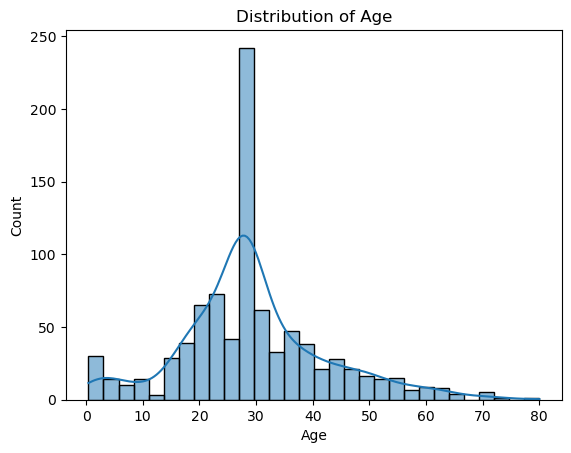

In [17]:
sns.histplot(data['Age'], kde = True)
plt.title('Distribution of Age')
plt.show()

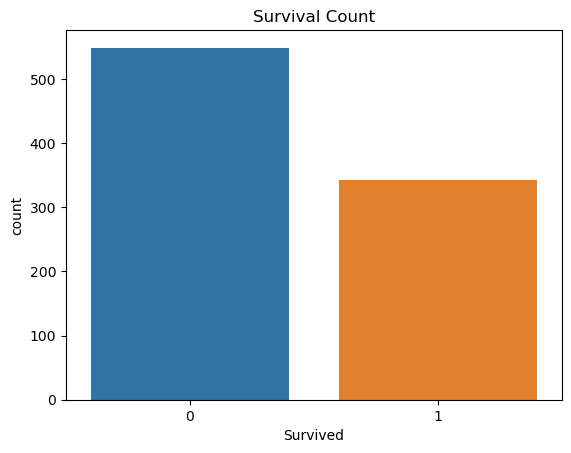

In [18]:
sns.countplot(x = 'Survived', data = data)
plt.title('Survival Count')
plt.show()

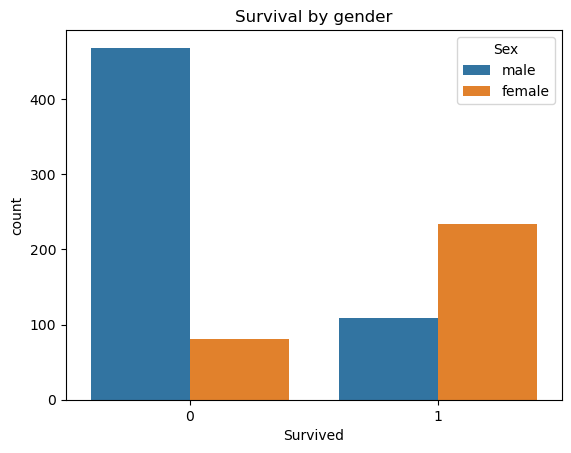

In [20]:
sns.countplot(x = 'Survived', hue = 'Sex', data = data)
plt.title('Survival by gender')
plt.show()

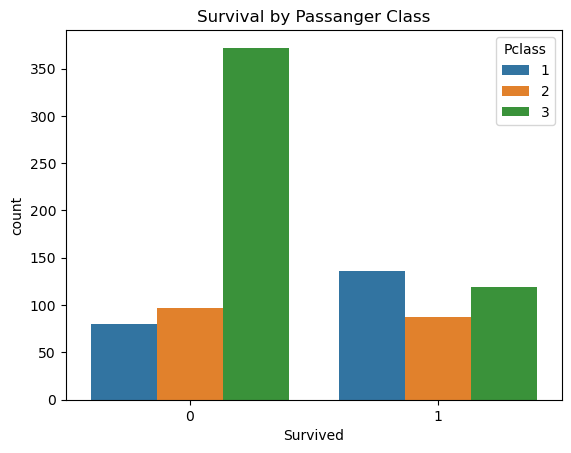

In [24]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = data)
plt.title('Survival by Passanger Class')
plt.show()

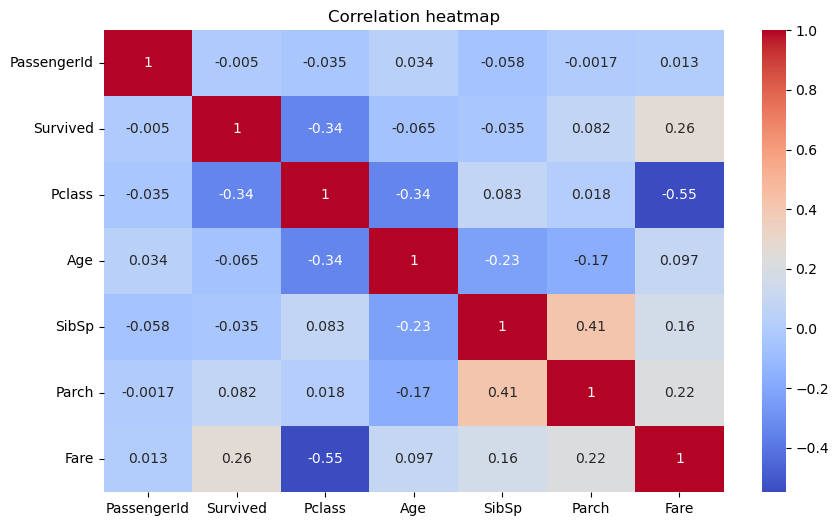

In [26]:
plt.figure(figsize = (10, 6))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation heatmap')
plt.show()

In [28]:
survival_by_gender = data.groupby('Sex')['Survived'].mean()
print(survival_by_gender)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [29]:
survival_by_class = data.groupby('Sex')['Pclass'].mean()
print(survival_by_class)

Sex
female    2.159236
male      2.389948
Name: Pclass, dtype: float64


In [30]:
data['Agegroup'] = pd.cut(data['Age'], bins = (0, 18, 36, 50, 100), labels = ('Child', 'Young', 'Adult', 'Elderly'))
survival_by_age = data.groupby('Agegroup')['Survived'].mean()
print(survival_by_age)

Agegroup
Child      0.503597
Young      0.359066
Adult      0.381679
Elderly    0.343750
Name: Survived, dtype: float64
